# Wine Quality Classification

In this assignment, we will use logistic regression to judge the quality of wines. The dataset is taken from UCI machine learning repository. For description of the dataset, see [here](https://archive.ics.uci.edu/ml/datasets/wine+quality).

Attributes of the dataset are listed as following:
1. fixed acidity 
2. volatile acidity 
3. citric acid 
4. residual sugar 
5. chlorides 
6. free sulfur dioxide 
7. total sulfur dioxide 
8. density 
9. pH 
10. sulphates 
11. alcohol 

Output variable (based on sensory data): 
12. quality (score between 0 and 10)

The following code loads the dataset, and the dataset looks like the following:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle
#train = np.genfromtxt('wine_training1.txt', delimiter=',')
red = pd.read_csv('winequality-red.csv')
white = pd.read_csv('winequality-white.csv')
red = shuffle(red, random_state = 10)
white = shuffle(white, random_state = 10)
red.head(10)
white.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4731            5.3              0.31         0.38            10.5      0.031   
937             6.1              0.36         0.58            15.0      0.044   
1217            8.0              0.61         0.38            12.1      0.301   
3296            6.6              0.28         0.42             8.2      0.044   
4524            6.6              0.16         0.25             9.8      0.049   
3640            6.8              0.19         0.33             4.9      0.047   
785             7.6              0.30         0.27            10.6      0.039   
393             7.3              0.24         0.43             2.0      0.021   
562             7.7              0.34         0.27             8.8      0.063   
1285            7.8              0.16         0.41             1.7      0.026   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
4731                 53.0                 140.0  0.99321  3.34       0.46   
937                  42.0                 115.0  0.99780  3.15       0.51   
1217                 24.0                 220.0  0.99930  2.94       0.48   
3296                 60.0                 196.0  0.99562  3.14       0.48   
4524                 59.5                 137.0  0.99500  3.16       0.38   
3640                 42.0                 130.0  0.99283  3.12       0.56   
785                  31.0                 119.0  0.99815  3.27       0.30   
393                  20.0                  69.0  0.99000  3.08       0.56   
562                  39.0                 184.0  0.99690  3.09       0.63   
1285                 29.0                 140.0  0.99100  3.02       0.78   

      alcohol  quality  
4731     11.7        6  
937       9.0        5  
1217      9.2        5  
3296      9.4        5  
4524     10.0        6  
3640     11.0        6  
785       9.3        6  
393      12.2        6  
562       9.2        6  
1285     12.5        6

## Data Splitting
To get this into a binary classification task. We split the quality into a binary feature *good* or *bad* depending on whether the quality is larger than 6 or not.

Next we randomly pick $70\%$ of the data to be our training set and the remaining for testing for both red and white wines.

In [4]:
from sklearn.model_selection import train_test_split
X_red = red.iloc[:, :-1]
y_red = red.iloc[:, -1] >= 6

X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red, y_red, test_size=0.3, random_state = 0)

X_white = white.iloc[:, :-1]
y_white = white.iloc[:, -1] >= 6
X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(X_white, y_white, test_size=0.3, random_state = 0)

#y_red.head(10)
y_white.head(10)

4731     True
937     False
1217    False
3296    False
4524     True
3640     True
785      True
393      True
562      True
1285     True
Name: quality, dtype: bool

## Problem 1 Logistic Regression for Red Wine

Using scikit learn, train a Logistic Regression classifier using 'X_trn_red, y_trn_red'. Use the
solver sag, which stands for Stochastic Average Gradient. Set max iteration to be 10000. Test the model on X_test_red. Output the testing error.

In [23]:
#========Your code here ======
error_red = 0
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(penalty='none',max_iter=10000,solver='sag')
# fit our training data 
logreg.fit(X_train_red,y_train_red)
test_predict = logreg.predict(X_test_red)
testSize = len(X_test_red)
misclassify = 0

for i, j in zip(y_test_red, test_predict):
    if i!=j:
        misclassify += 1
error_red = float(misclassify)/float(testSize)      
#========================
print('The testing error for red wine is: ' + str(error_red) + '.')

The testing error for red wine is: 0.27291666666666664.


## Problem 2 Logistic Regression for White Wine

Using scikit learn, train a Logistic Regression classifier using 'X_trn_white, y_trn_white'. Use the
solver sag, which stands for Stochastic Average Gradient. Set max iteration to be 10000. Test the model on X_test_white. Output the testing error.

In [25]:
#========Your code here ======
error_white = 0
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(penalty='none',max_iter=10000,solver='sag')
# fit our training data 
logreg.fit(X_train_white,y_train_white)
test_predict = logreg.predict(X_test_white)
testSize = len(X_test_white)
misclassify = 0

for i, j in zip(y_test_white, test_predict):
    if i != j:
        misclassify += 1
error_white = float(misclassify)/float(testSize)   
#========================
print('The testing error for white wine is: ' + str(error_white) + '.')

The testing error for white wine is: 0.25918367346938775.


## Problem 3 
Use the model you trained using 'X_trn_white, y_trn_white' to test on 'X_test_red' and use the model you trained on 'X_test_white'. Print out the errors and compare with previous results. Explain.

In [27]:
#========Your code here ======
error_white = 0
error_red = 0
from sklearn.linear_model import LogisticRegression
# fit the white data for white classifier
logregwhite = LogisticRegression(penalty='none',max_iter=10000,solver='sag')
logregwhite.fit(X_train_white,y_train_white)
# fit the red data for white classifier
logregred = LogisticRegression(penalty='none',max_iter=10000,solver='sag')
logregred.fit(X_train_red,y_train_red)

# generate the predictions for respective test sets
test_predictRedUsingWhite = logregwhite.predict(X_test_red)
test_predictWhiteUsingRed = logregred.predict(X_test_white)

misclassifyred = 0
misclassifywhite = 0
testSizeRed = len(test_predictRedUsingWhite)
testSizeWhite = len(test_predictWhiteUsingRed)

# error calculation for white, red classifier on red, white training sets
for i, j in zip(y_test_red, test_predictRedUsingWhite):
    if i != j:
        misclassifyred += 1
        
for i, j in zip(y_test_white, test_predictWhiteUsingRed):
    if i!=j:
        misclassifywhite += 1
        
error_red = float(misclassifyred)/float(testSizeRed)  
error_white = float(misclassifywhite)/float(testSizeWhite) 

#========================
print('The testing error for red wine using white wine training data is: ' + str(error_red) + '.')
print('The testing error for white wine using red wine training data is: ' + str(error_white) + '.')

The testing error for red wine using white wine training data is: 0.35833333333333334.
The testing error for white wine using red wine training data is: 0.3326530612244898.


### <font color='blue'>  Explanation for Problem 3 </font> ###
<font color='blue'>  The testing error for red wine and white wine are both higher when the reversed models are used. The testing error for red and white wine respectively when reversed models are used are: 35.8% and 33.2%. Before, when the right models are used, the errors for red and white wine are: 27.2% and 25.9%. A likely explanation is that although red and white wine features may be somewhat similar, when applying the wrong model, the classifier suffers some inaccuracy due to the fact that the classifier cannot apply its learned information on a different set of wine categories. An analogy in real life would be using information learned for rating quality of oranges on apples. Although symmetry and weight can be somewhat applied, the other features simply do not map well together.</font>

## Problem 4 The effect of regularization
Using red wine dataset. Implement logistic regression in sklearn, using $\ell_2$ regularization with regularizer value C in the set $\{0.00001 \times 4^i: i = 0,1,2,..., 15\}$. (The regularization parameter is 'C' in scikit-learn, which is the inverse of $\lambda$ we see in class). Plot the training error and test error with respect to the regularizer value. Explain what you get.

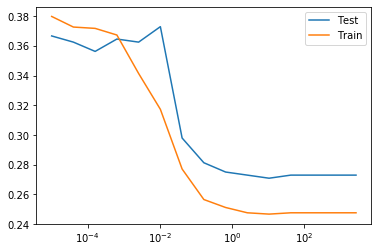

In [39]:
from sklearn.linear_model import LogisticRegression
N = np.array(range(0,15))
alpha = 0.00001*(4**N)
error_trn = np.zeros(15)
error_tst = np.zeros(15)
#========Your code here ======
# iterate over the l5 regularization values in set {0.00001×4𝑖:𝑖=0,1,2,...,14}
for i in range(0,len(N)):
    logreg = LogisticRegression(max_iter=10000,solver='sag',C=alpha[i])
    # fit our training data 
    logreg.fit(X_train_red,y_train_red)
    # predict for training and test data
    train_predict = logreg.predict(X_train_red)
    test_predict = logreg.predict(X_test_red)
    testSize = len(X_test_red)
    trainSize = len(X_train_red)
    misclassifytest = 0
    misclassifytrain = 0
    for x, y in zip(y_train_red, train_predict):
        if x!=y:
            misclassifytrain += 1
    error_red_train = float(misclassifytrain)/float(trainSize)  
    error_trn[i] = error_red_train
    for x, y in zip(y_test_red, test_predict):
        if x!=y:
            misclassifytest += 1
    error_red_test = float(misclassifytest)/float(testSize)  
    error_tst[i] = error_red_test 
#========================
plt.figure(1)
plt.semilogx(alpha, error_tst,label = 'Test')
plt.semilogx(alpha, error_trn, label = 'Train')
plt.legend()

### <font color='blue'>  Explanation for Problem 4 </font> ###
<font color='blue'> For the training error, when the C factor is increased from an order of 10^-4 to an order of 10^2, the error dropped from 38% to 25%. This is the expected behavior. As the C factor is increased, the regularization parameter decreases because C is the inverse of the regularization factor. Thus, when we increase C, we are decreasing lambda, making the model less prone to underfitting. Similarly, for the testing error, when the C factor is increased, the error dropped from 37% to around 28%. An interesting behavior is that the tesing error increased between a C factor of 10^-4 to 10^-2, followed by a large drop after 10^-2. Overall, the training error is lower than the testing error, as the model is expected to do better on data it has seen before. The end goal is to find the regularization parameter that optimizes the model's performance.</font>